<a href="https://colab.research.google.com/github/balaprasanna20/ml-demo/blob/main/decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
df=pd.read_csv('/content/Automobile.csv')
df

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,usa


In [20]:
null_count=df.isnull().sum()
print(null_count)

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


In [21]:
duplicates=df[df.duplicated()]
print(duplicates)

duplicate_count=df.duplicated().count()
print(duplicate_count)

Empty DataFrame
Columns: [name, mpg, cylinders, displacement, horsepower, weight, acceleration, model_year, origin]
Index: []
398


<Figure size 800x500 with 0 Axes>

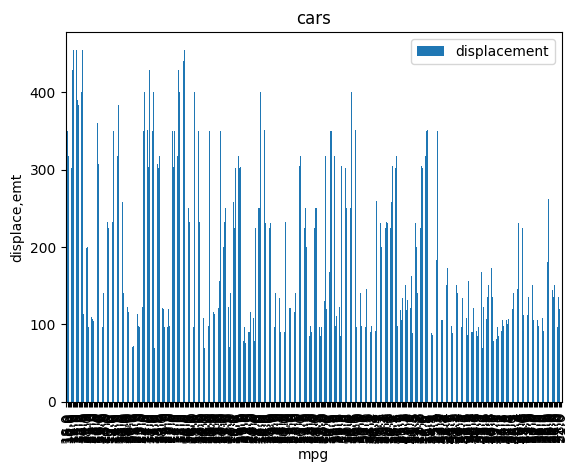

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv('/content/Automobile.csv')
plt.figure(figsize=(8,5))
df.plot(x='mpg',y='displacement',kind='bar')
plt.xlabel('mpg')
plt.ylabel('displace,emt')
plt.title('cars')
plt.show()

/tmp/ipython-input-35-3094993243.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cylinders'].fillna(df['cylinders'].mean(), inplace=True)


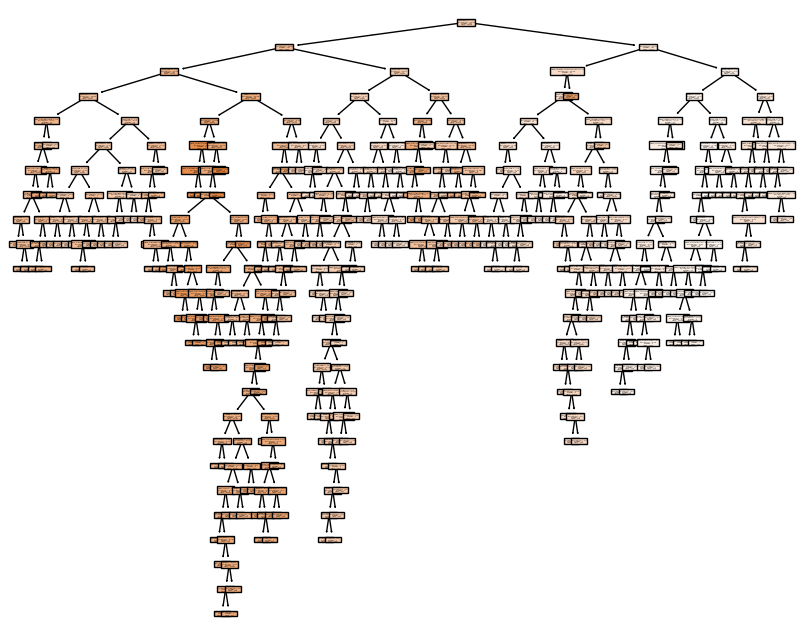

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load data
df = pd.read_csv('/content/Automobile.csv')

# Handle missing values
df['cylinders'].fillna(df['cylinders'].mean(), inplace=True)

# Split data
X = df.drop('mpg', axis=1)
y = df['mpg']
# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# Visualize decision tree
plt.figure(figsize=(10,8))
plot_tree(regressor, feature_names=X.columns, filled=True)
plt.show()

In [16]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the CSV file
def load_data(file_path):
    try:
        data = pd.read_csv(file_path)
        return data
    except Exception as e:
        print("Error occurred while loading data:", str(e))

# Prepare the data
def prepare_data(data):
    try:
        # Separate target variable
        X = data.drop('origin', axis=1)
        y = data['origin']
        # One-hot encode categorical features
        X = pd.get_dummies(X, drop_first=True)
        return X, y
    except Exception as e:
        print("Error occurred while preparing data:", str(e))

# Train the decision tree model
def train_model(X_train, y_train):
    try:
        model = DecisionTreeClassifier()
        model.fit(X_train, y_train)
        return model
    except Exception as e:
        print("Error occurred while training the model:", str(e))

# Evaluate the model
def evaluate_model(model, X_test, y_test):
    try:
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        return accuracy, report
    except Exception as e:
        print("Error occurred while evaluating the model:", str(e))

# Main function
def main():
    file_path = "/content/Automobile.csv"  # Replace with your CSV file path
    data = load_data(file_path)
    # Drop rows with missing values
    data.dropna(inplace=True)
    X, y = prepare_data(data)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = train_model(X_train, y_train)
    accuracy, report = evaluate_model(model, X_test, y_test)

    print("Model Accuracy:", accuracy)
    print("Classification Report:\n", report)

if __name__ == "__main__":
    main()

Model Accuracy: 0.7848101265822784
Classification Report:
               precision    recall  f1-score   support

      europe       0.71      0.50      0.59        20
       japan       0.67      0.75      0.71        16
         usa       0.85      0.93      0.89        43

    accuracy                           0.78        79
   macro avg       0.74      0.73      0.73        79
weighted avg       0.78      0.78      0.78        79

